In [1]:
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt

#### Функции

In [2]:
# Диаграмма нулей и полюсов
def ZerosPolesDiagram(z, p):
    fg, ax = plt.subplots(figsize=(5, 5))
    circle = plt.Circle(xy=(0,0),radius=1, edgecolor='gray', facecolor='white', linestyle='--')
    ax.add_patch(circle)
    ax.scatter(z.real, z.imag, marker='o', facecolor='white', edgecolor='C0', s=100)
    ax.scatter(p.real, p.imag, marker='x', s=100)
    ax.axhline(y=0, color="black", linestyle="-")
    ax.axvline(x=0, color="black", linestyle="-")
    ax.grid()
    plt.show()

# Расчет АЧХ
def FrequencyResponse(h):
    with np.errstate(divide='ignore'): # suppress RuntimeWarning: divide by zero encountered in log10
        return 20 * np.log10(abs(h))

# Расчет ФЧХ
def PhaseResponse(h):
    return np.unwrap(np.angle(h))

# Графики АЧХ и ФЧХ
def FRPRDiagram(w, fr, pr, **kwargs):
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,5), layout='constrained')

    ax[0].plot(w, fr, 'b')
    ax[0].set_ylabel('Амплитуда, дБ', color='b')
    ax[0].set_xlabel('Частота, рад')
    ax[0].grid(True)

    ax[1].plot(w, pr, 'g')
    ax[1].set_ylabel('Фаза, рад', color='g')
    ax[1].set_xlabel('Частота, рад')
    ax[1].grid(True)

    if 'title' in kwargs.keys():
        fig.suptitle(kwargs['title'])

    if 'ylimits' in kwargs.keys():
        ax[0].set_ylim(kwargs['ylimits'])

    if 'xvlines' in kwargs.keys():
        for xvline in kwargs['xvlines']:
            for axis in ax:
                axis.axvline(x=xvline, color='gray', linestyle='dashed', linewidth=1.5)
    
    plt.show()

#### Исходные данные

In [3]:
# Исходные данные

# Коэффициенты прямых связей
b = [1., -3.979582, 7.872744, -9.657728, 7.872744, -3.979582, 1.]

# Коэффициенты обратных связей
a = [1., 2.751455, -1.734483, -4.577439, 3.850063, -0.779725, 0]

# Коэффициенты секций второго порядка [b0,b1,b2,a0,a1,a2], где b - коэффициенты прямых связей, a - коэффициенты обратных связей
s = [[1.,-0.592930,1.,1.,1.819818,-0.849748],
     [1.,-1.641792,1.,1.,1.802068,-0.932227],
     [1.,-1.744860,1.,1.,1.799134,-0.984304]]


#### Импульсная характеристика фильтра

Результаты расчета: 
1.0 -9.4006 51.8042 -220.3098 805.9824 -2677.8508 8329.3187 -24701.5501 70666.0404 -196563.0634 534589.2337 -1427368.3335 3753023.7789 -9740526.2252 25000390.3113 -63550766.9738 160187936.5455 -400780456.213 996119799.269 -2461209259.9373 6048886996.3377 -14794949412.4515 36029106977.083 -87389947734.2396 211194503127.7962 -508679939405.1543 1221407074336.1487 -2924357348831.516 6983035198203.766 -16633440912372.596


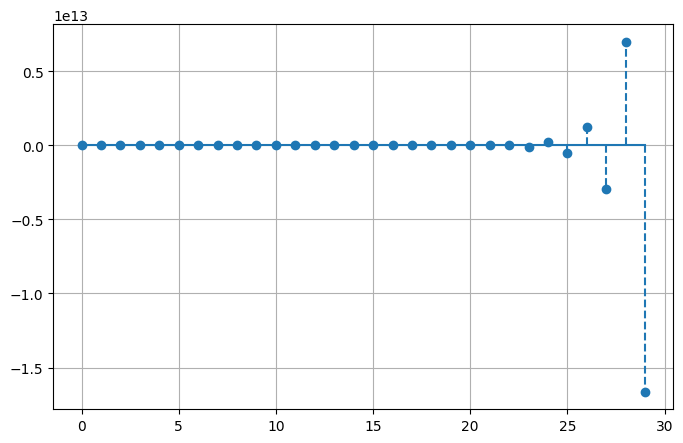

In [4]:
# Импульсная характеристика фильтра

# Входной сигнал
# x = [1.] + 30*[0.]
x = [1., *np.zeros(shape=29)]

# Отклик фильтра на воздействие единичного сигнала x
# Возвращаемое значение:
# y - массив результирующих значений
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# x - массив исходных значений
y = sp.sosfilt(sos=s, x=x)

print('Результаты расчета: ')
print(*list(np.round(a=y, decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(y, linefmt='C0--', basefmt='C0-')
# ax.set(xticks=range(len(x)), yticks=range(0, 40, 5))
ax.grid()
plt.show()

Результаты расчета: 
1.0 -6.731 28.1274 -94.1464 281.0377 -785.0914 2104.1091 -5480.2552 13979.0878 -35095.0263 87010.234 -213548.0938 519746.9393 -1256153.9084 3017880.4577 -7213212.2948 17163756.2464 -40680801.972 96085115.6474 -226243545.4845 531237179.7646 -1244260361.9457 2907678635.9253 -6780817711.417 15783203694.1794 -36673566487.4834 85077660085.9945 -197076613614.2707 455888673847.6315 -1053243307894.6375


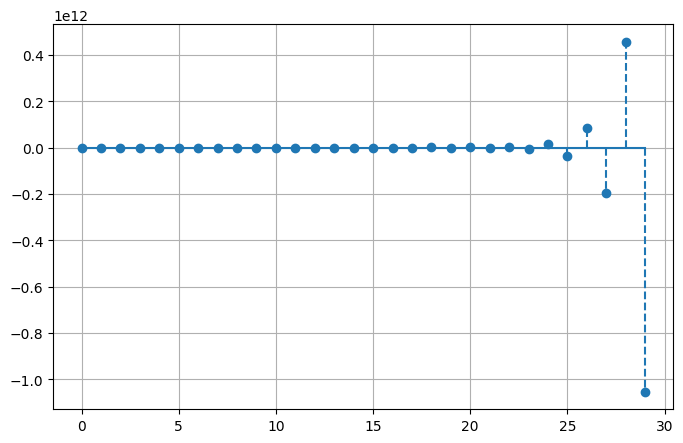

In [5]:
# Импульсная характеристика фильтра

# Возвращаемые значения:
# t - отсчеты времени, для которых рассчитываются значения
# y - массив результирующих значений
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# 1 - шаг временных отсчетов
# n = количество рассчитываемых отсчетов
t, y = sp.dimpulse(system=(b,a,1), n=30)

print('Результаты расчета: ')
print(*list(np.round(a=y[0][:,0], decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(t,*y, linefmt='C0--', basefmt='C0-')
# # ax.set(xticks=range(len(x)), yticks=range(0, 40, 5))
ax.grid()
plt.show()

#### Переходная характеристика фильтра

Результаты расчета: 
1.0 -8.4006 43.4036 -176.9062 629.0761 -2048.7746 6280.5441 -18421.006 52245.0345 -144318.0289 390271.2047 -1037097.1288 2715926.6501 -7024599.5751 17975790.7361 -45574976.2376 114612960.3079 -286167495.9051 709952303.3639 -1751256956.5734 4297630039.7643 -10497319372.6873 25531787604.3957 -61858160129.8438 149336342997.9523 -359343596407.2018 862063477928.9467 -2062293870902.5688 4920741327301.197 -11712699585071.402


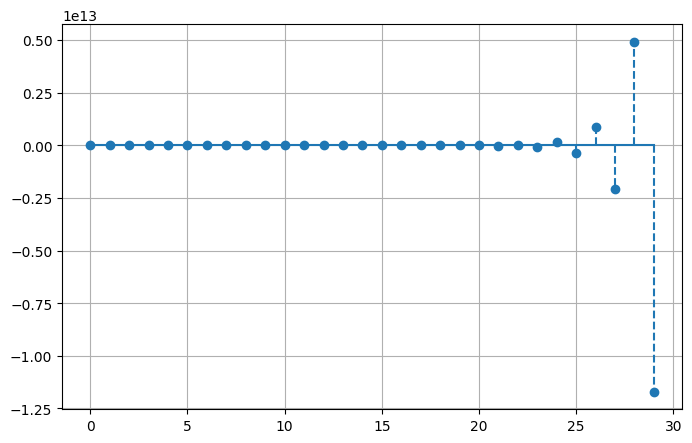

In [6]:
# Переходная характеристика фильтра

# Входной сигнал
x = np.ones(shape=30)

# Отклик фильтра на воздействие входного сигнала x
# Возвращаемое значение:
# y - массив результирующих значений
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# x - массив исходных значений
y = sp.sosfilt(sos=s, x=x)

print('Результаты расчета: ')
print(*list(np.round(a=y, decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(y, linefmt='C0--', basefmt='C0-')
# ax.set(xticks=range(len(x)), yticks=range(0, 40, 5))
ax.grid()
plt.show()

Результаты расчета: 
1.0 -5.731 22.3963 -71.75 209.2877 -575.8037 1528.3053 -3951.9499 10027.1379 -25067.8883 61942.3457 -151605.7481 368141.1912 -888012.7171 2129867.7406 -5083344.5542 12080411.6922 -28600390.2798 67484725.3676 -158758820.1169 372478359.6476 -871782002.2981 2035896633.6272 -4744921077.7899 11038282616.3896 -25635283871.094 59442376214.9008 -137634237399.3706 318254436448.2626 -734988871446.3788


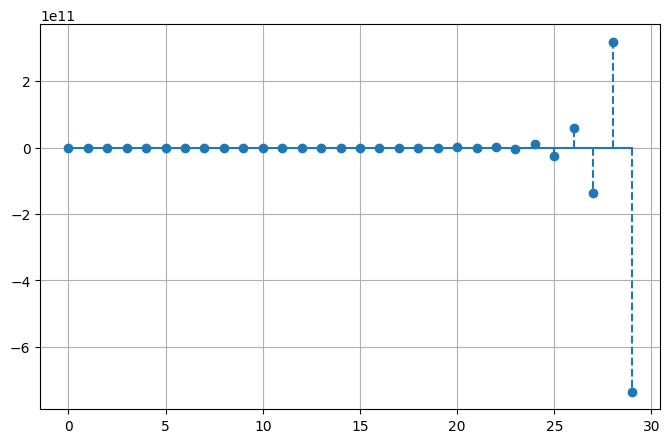

In [7]:
# Переходная характеристика фильтра

# Возвращаемые значения:
# t - отсчеты времени, для которых рассчитываются значения
# y - массив результирующих значений
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# 1 - шаг временных отсчетов
# n = количество рассчитываемых отсчетов
t, y = sp.dstep((b,a,1), n=30)

print('Результаты расчета: ')
print(*list(np.round(a=y[0][:,0], decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(*y, linefmt='C0--', basefmt='C0-')
# ax.set(xticks=range(len(x)), yticks=range(0, 40, 5))
ax.grid()
plt.show()

#### Расчет нулей и полюсов

In [16]:
# Возвращаемые значения:
# z - значения нулей фильтра
# p - значения полюсов фильтра
# k - коэффициент усиления фильтра
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
z, p, k = sp.tf2zpk(b=b, a=a)

print(f'Нули: {z}')
print(f'Полюса: {p}')
print(f'Коэффициент усиления: {k}')

Нули: [0.29646481+0.95504378j 0.29646481-0.95504378j 0.87243177+0.48873592j
 0.87243177-0.48873592j 0.82089442+0.57107999j 0.82089442-0.57107999j]
Полюса: [-2.23879934 -2.22166783  0.84974844  0.43964953  0.41961419  0.        ]
Коэффициент усиления: 1.0


#### Диаграмма нулей и полюсов

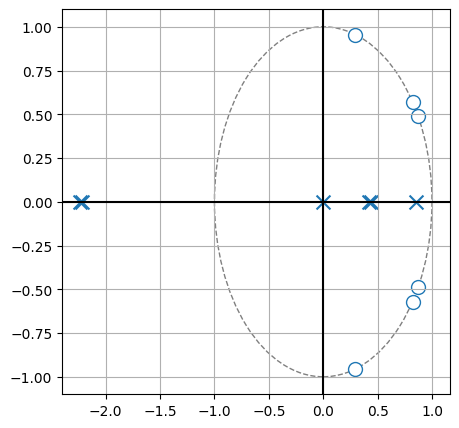

In [17]:
ZerosPolesDiagram(z=z, p=p)

#### Амплитудно-частотная и фазо-частотная характеристики фильтра

In [10]:
# Определяем АЧХ и ФЧХ фильтра

# Функция freqz возвращает отклик цифрового фильтра
# Возвращаемые значения:
# w - частоты, для которых был рассчитан отклик фильтра
# h - отклик фильтра, представленный в виде комплексных чисел
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# worN - количество вычисляемых откликов
# whole - False: вычисляется отклик на частоты от 0 до Пи, True: вычисляется отклик на частоты от 0 до 2Пи
# include_nyquist - вычислять отклик для конечной частоты (в данном случае для 2Пи), который по умолчанию не вычисляется
w, h = sp.sosfreqz(sos=s, worN=512, whole=True)

In [11]:
# Пример расчета модуля отклика фильтра
print(np.sqrt(h[5].real**2 + h[5].imag**2), abs(h[5]))

0.018596798162159388 0.018596798162159388


In [12]:
# Пример расчета аргумента отклика фильтра
print(np.arctan(h[5].imag/h[5].real), np.angle(h[5]))

-0.18775460726043663 -0.18775460726043663


In [13]:
# Расчет АЧХ по откликам фильтра
fr = FrequencyResponse(h=h)

# Расчет ФЧХ по откликам фильтра
pr = PhaseResponse(h=h)

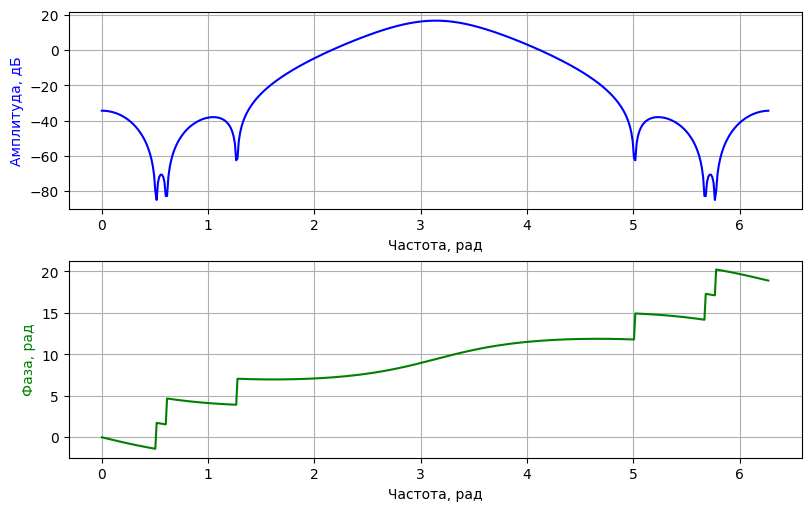

In [14]:
# Графики АЧХ и ФЧХ
FRPRDiagram(w=w, fr=fr, pr=pr)